In [3]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
    library(EvolutionaryGames)
    library(ggthemes)
    library(latex2exp)
    library(ggtext)
}))

In [2]:
setwd("/home/zuo_r/involution")

In [4]:
duplicate_dynamic<-function(y,x,M,N,beta1,beta2,d,c,l){
  
  # #-----参数解释说明------#
  # #初始内卷的比例
  # y<-0.5
  # #合作中躺平的比例
  # x<-0.5
  # 
  # #M资源 c(5,15,25)
  # M<-1000
  # #N个个体
  # N<-100
  # 
  # #内卷相对躺平的效用
  # beta1<-4
  # #合作相对躺平的效用
  # beta2<-2
  # 
  # #more effort的成本
  # d<-4
  # #less effort的成本
  # c<-1
  # #躺平的成本
  # l<-0.5
  # #-----------------------#
  
  #这里决定用N-1
  #需要取整
  #Nd<-floor(y*(N-1))  #我重新尝试了取整，没有报错
  Nd<-floor(y*(N-1))
  Nc<-floor((N-1)*(1-y)*x)
  Nl<-N-1-Nd-Nc
  
  #策略d(defect，more effort)\策略c（cooperate, less effort）\策略躺平l（lay down）的收益
  #（1）个体选择策略d的期望收益
  pai_d<-(beta1*d*M)/((Nd+1)*beta1*d+Nc*beta2*c+Nl*l)-d
  #（2）个体选择策略c的期望收益
  pai_c<-(beta2*c*M)/(Nd*beta1*d+(Nc+1)*beta2*c+Nl*l)-c
  #(3)个体选择策略l的期望收益
  pai_l<-(l*M)/(Nd*beta1*d+Nc*beta2*c+(Nl+1)*l)-l
  
  #群体体选择策略c或d的收益  = 概率*pai
  #等价Pc<(choose(N-1, Nc)*((1-y)^Nc)*(y^Nd))*pai_c
  # Pc<-(choose(N-1, Nd)*(y^Nd)*((1-y)^Nc))*pai_c
  # Pd<-(choose(N-1, Nd)*(y^Nd)*((1-y)^Nc))*pai_d #choose计算组合数
  
  #n即Nd,累加收集概率 
  #每种策略，所有该人群的期望收益
  Pc<-0
  Pd<-0
  Pl<-0
  for(n in 0:(N-1)){  
    Pd<-Pd+(choose(N-1, n)*(y^n)*((1-y)^(N-1-n)))*pai_d
    Pc<-Pc+(choose(N-1, n)*(y^Nd) *((1-y)*x)^n*((1-y)*(1-x))^(N-1-Nd-Nc))*pai_c
    Pl<-Pl+(choose(N-1, n)*(y^Nd) *((1-y)*x)^Nc*((1-y)*(1-x))^n)*pai_l
  }
  
  
  #（3）群体策略的期望收益
  R_<-y*Pd+(1-y)*x*Pc+(1-y)*(1-x)*Pl
  
  #(4)复制动态方程
  #
  y.<-ifelse(is.na(y*(Pd-R_)),0,y*(Pd-R_)) 
}

In [5]:
#----------------------------------------------------------------------#
#------------------------------图1-------------------------------------#
#----------------------------------------------------------------------#
plot_y._y<-function(M){
  y.<-c()
  
  for(y in seq(0, 0.99, 0.01)){
    temp<-duplicate_dynamic(y,x=0.5,M,N=100,beta1=4,beta2=2,d=4,c=1,l=0.5) #调整N=5，即可用M=5,15,25复现
    
    # N: 个体数
    # M: 资源 c(5,15,25)
    # c: less effort的成本
    # beta: 投入效用
    # d: more effort的成本
    
    y.<-c(y.,temp)
  }
  
  df <- data.frame(x = seq(0, 0.99, 0.01), y = y.) %>% 
    mutate(y1=c(y.[-1],1)) %>% 
    mutate(y0=y*y1)#通过前一项与后一项相乘是否小于0，来获取临界点ystar
  
  #ystar<-df$x[df$y0<0]+0.005 #即横坐标，因为是以0.01为步长移动，取0.005为均值加上
  
  ystar<-ifelse(sum(df$x[df$y0<0])==0,0,df$x[df$y0<0]+0.005)
  
  ggplot(df,aes(x=x,y=y))+
    geom_line(color="black",size=0.3)+
    theme_few() +
    geom_point(aes(x=ystar,y=0))+
    geom_text(aes(x=ystar,y=0),label=paste("y*:",ystar),size=4,nudge_y = 0.001,nudge_x = 0.03,color="red")+
    geom_hline(aes(yintercept = 0),size=0.3)+
    labs(x = "y", y = "y.")
}


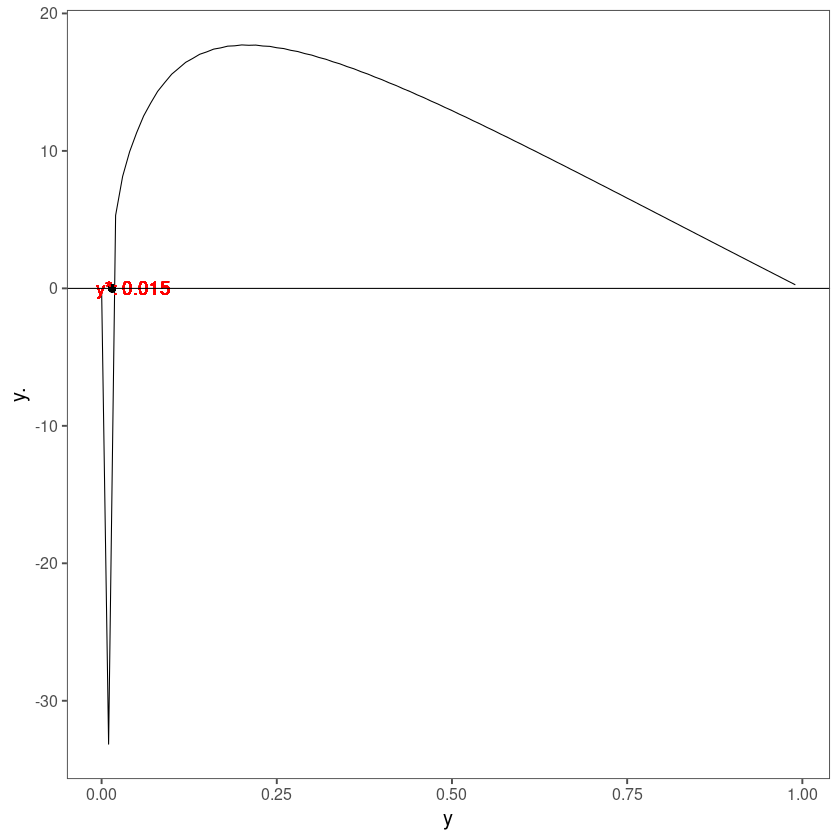

In [9]:
#---1. fig1 (a1)---#
plot_y._y(M=3000)

In [ ]:
#调节M，图像无变化？什么原因？